<h1><center>Laboratorio 8: Predicciones y Recomendaciones 🔮🪄 </center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2024</strong></center>

### **Cuerpo Docente:**

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Eduardo Moya
- Ayudantes: Nicolás Ojeda, Melanie Peña, Valentina Rojas

### **Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados**

- Nombre de alumno 1: Lucas Carrasco
- Nombre de alumno 2: Nicolás Herrera

### **Link de repositorio de GitHub:** [Insertar Repositorio](https://github.com/vspartamo/MDS7202)

## Temas a tratar
- Series de Tiempo.
- Predicciones vía `Prophet`.
- Implementar un sistema de recomendación utilizando `surprise`.

## Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.
- Código que no se pueda ejecutar, no será revisado.

### Objetivos principales del laboratorio
- Comprender qué es una serie de tiempo y su estructura.
- Identificar tendencias, estacionalidades e irregularidades.
- Armar un modelo predictivo para la serie.
- Conocer y aplicar sistemas de recomendación.
- Entender estructura y conocer casos de estudio.


In [157]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except:
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


In [158]:
# Librerias globales

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import plotly.express as px

# **1. Forecasting (30 puntos)**


## **Prophet**

Prophet es una herramienta open-source de Facebook utilizada para realizar predicciones en series de tiempo. Esta se basa en la descomposición aditiva, donde tendencias no lineales se ajustan junto a la estacionalidad.

En la ecuación de a continuación se puede ver una idea general de los elementos que construyen a un modelo aditivo como lo es Prophet.

\begin{equation}
y(t) = g(t) + s(t) + h(t) + e(t)
\end{equation}

Donde, $g(t)$ hace referencia a las tendencias, que corresponden a cambios graduales en largos periodos de tiempo. $s(t)$ corresponde a la estacionalidad, son cambios periodicos o cortos en el tiempo. $h(t)$ es el efecto que tienen las festividades sobre las predicciones, mientras que e(t) corresponde al error o ruido. Finalmente $y(t)$, es la predicción hecha por el modelo.

Prophet trabaja por defecto con Piece-Wise Lineal Model, este es un modelo de regresión lineal, en el cual se buscan distintas zonas en que la data presente patrones o tendencias lineales, de estas zonas obtiene su regresión y luego las "une" de manera de representar toda la región, como se puede ver en la ecuación siguiente.

\begin{equation}
y(x)=
    \begin{cases}
        η_1 + \beta_1(x-b_1), & b_1 < x  \leqslant b_2 \\
        η_2 + \beta_2(x-b_2), & b_2 < x  \leqslant b_3 \\
        η_3 + \beta_3(x-b_3), & b_3 < x  \leqslant b_3 \\
        ... \\
        η_k + \beta_{nb}(x-b_{nb-1}), & b_{n-1} < x  \leqslant b_{nb} \\
    \end{cases}
\end{equation}

Siendo $b_1$ el primer punto de quiebre en la serie y así hasta el punto $b_{nb}$ correspondiente al último punto de quiebre de la serie con una cantidad $nb$ de puntos.

Para mayor información de Prophet y como utilizarla, pueden ver su [documentación](https://facebook.github.io/prophet/docs/quick_start.html#python-api), donde hay pueden encontrar un pequeño tutorial de la librería.

## **La Factura de Homero**

<center>
<img src ="https://i.makeagif.com/media/7-30-2018/H_ZAY1.gif" width = 500 />

Homero Simpson ha trabajado en la Planta Nuclear de Springfield por más de 20 años como Inspector de Seguridad, pero recientemente el Sr. Burns le ha permitido trabajar desde casa. Aunque le encanta la flexibilidad que esto le otorga, también ha notado un aumento considerable en su consumo energético en el hogar. Con el uso constante de calefacción en invierno y aire acondicionado en verano, Homero está preocupado por cómo afectará esto a su presupuesto en los próximos meses, ya que planea pasar aún más tiempo en casa.

Afortunadamente, gracias a su puesto en la Planta de Energía Nuclear, Homero tiene acceso a los datos de consumo de energía de cada ciudadano en Springfield, por lo que accede a esta información y almacena el consumo de su hogar en un archivo llamado `energia_homero.csv`. Este archivo posee el consumo diario en el hogar de Homero Simpson desde el Junio del 2016 hasta Julio del 2020.

Con esta valiosa información, Homero espera poder predecir su consumo energético y tomar decisiones informadas para ajustar su presupuesto mensual.

Los datos son los siguientes:

* **date**: Fecha de medición.
* **Energy_kWh**: Consumo diario de energía eléctrica en el hogar de Homero (en kWh).

## 1.1 Series de Tiempo [0 puntos]

### Carga de los datos

En primer lugar, cargue los datos históricos del archivo `energia_homero.csv` al entorno de trabajo. Una vez cargados, asegúrense de transformar la columna `date` a formato `datetime`. Además, visualice el consumo de energía en la casa de Homero mediante la librería `plotly`.


**Respuesta**:

In [159]:
df = pd.read_csv('energia_homero.csv')
df['date'] = pd.to_datetime(df['date']) # formatear date como datetime
df.head()

,date,Energy_kWh
0,2016-06-01,29.691
1,2016-06-02,28.789
2,2016-06-03,19.247
3,2016-06-04,22.883
4,2016-06-05,25.195


In [160]:
fig = px.line(df, x='date', y='Energy_kWh', title='Consumo temporal de Energía', labels={'Energy_kWh':'Energía (kWh)', 'date':'Fecha'})
fig.show()

## 1.2 Controlando la Serie de Tiempo [6 puntos]

<center>
<img src ="https://i.pinimg.com/originals/66/77/88/667788e0b1f08ff1e1cfce11d303b203.gif" width = 500 />

Luego de leer mucho, Homero cree que necesita descomponer la serie de tiempo para poder controlar estos componentes de forma efectiva y lograr que la serie tenga propiedades de una serie estacionaria.

Usted, como buen ciudadano de Springfield, decide ayudar a Homero, el cual le pide que realice lo siguientes pasos:

0. Cree un conjunto de entrenamiento y uno de prueba (a proyectar). Para ello, considere como entrenamiento la información **hasta** el `2020-02-29` y como conjunto de prueba **desde** el `2020-03-01`. [0 puntos]
1. Cree un `Pipeline` que permita obtener una representación de la tendencia de la serie de tiempo, mediante un modelo Lineal. Nombre al pipeline `Pipeline_trend`. [1 punto]
2. Entrene el modelo lineal y luego obtenga predicciones tanto para el conjunto de entrenamiento como para el de prueba (intervalo completo de tiempo). Luego grafique las predicciones y calcule el `Mean Absolute Error` (MAE), tanto para el conjunto de prueba como para el de entrenamiento. [1 punto]
3. Grafique el error (Valor real - Valor predicho) para todo el intervalo de tiempo y responda ¿Hay un comportamiento estacional en la serie? [1 punto]
4.  Cree un `Pipeline` que permita modelar la estacionalidad de la serie temporal mediante términos de Fourier y la represente a través de una Regresión Lineal de la variable objetivo. Nombre a este pipeline `Pipeline_seasonal`. Determine el valor de Periodos `P` y el número de terminos de Fourier `n`. [1 punto]
5. Entrene el nuevo modelo y obtenga predicciones en el intervalo completo de tiempo. Luego grafique y calcule el `MAE` en el conjunto de prueba y en el de entrenamiento. [1 punto]
6. Vuelva a graficar el error y comente los resultados. [1 punto]

**Respuesta**

In [161]:
df['set'] = np.where(df['date'] <= pd.Timestamp('2020-02-29'), 'Train', 'Test')

train = df[df['set'] == 'Train'].copy()
test = df[df['set'] == 'Test'].copy()
target = 'Energy_kWh'

X_train = train.drop(columns=['set'])
y_train = train[target].copy()

X_test = test.drop(columns=['set'])
y_test = test[target].copy()

print(f'% destinado a train: {len(train) / len(df):.2f}')
print(f'% destinado a test: {len(test) / len(df):.2f}')

% destinado a train: 0.91
% destinado a test: 0.09


In [162]:
from sklearn.base import BaseEstimator, TransformerMixin

class TimeTransformer(TransformerMixin, BaseEstimator):
    def __init__(self):

        self.init_date = None

    def fit(self, X, y=None):

        assert isinstance(X, pd.DataFrame), 'df must be a pandas DataFrame'
        assert 'date' in X.columns, 'date must be a column of DataFrame'

        self.init_date = X.date.iloc[0]

        return self

    def transform(self, X):

        X = X.copy()

        assert self.init_date is not None, 'transformer must be fitted first!'
        assert isinstance(X, pd.DataFrame), 'df must be a pandas DataFrame'
        assert 'date' in X.columns, 'date must be a column of DataFrame'

        final_date = X.date.iloc[-1] # last date of X

        # generate trend series
        count = (final_date - self.init_date).days + 1
        X['trend'] = [i for i in range(count)][-len(X):]

        return X[['trend']]

    def fit_transform(self, X, y=None):

        X = X.copy()

        assert isinstance(X, pd.DataFrame), 'df must be a pandas Dataframe'
        assert 'date' in X.columns, 'date must be a column of DataFrame'

        self.trend = len(X)
        self.init_date = X.date.iloc[0]

        final_date = X.date.iloc[-1] # last date of X

        # generate trend series
        count = (final_date - self.init_date).days + 1
        X['trend'] = [i for i in range(count)][-len(X):]

        return X[['trend']]

transformer = TimeTransformer()
transformer.fit_transform(X_train) 



,trend
0,0
1,1
2,2
3,3
4,4
...,...
1364,1364
1365,1365
1366,1366
1367,1367


In [163]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

pipeline = Pipeline([
    ('time_features', TimeTransformer()),
    ('ols', LinearRegression())
])

pipeline.fit(X_train, y_train)
train_pred = pipeline.predict(X_train)
test_pred = pipeline.predict(X_test)

y_pred = np.concatenate([train_pred, test_pred])

In [164]:
# plot
fig = px.scatter(df, x=df.date, y=target, title='Forecast de Energia', color='set')
fig.add_scatter(x=df.date, y=y_pred, mode='lines', name='Prediction', line=dict(color='green', width=3))
fig.update_traces(marker=dict(size=3.5))
fig.show()

In [165]:
from sklearn.metrics import mean_absolute_error

mae_train = mean_absolute_error(y_train, train_pred)
mae_test = mean_absolute_error(y_test, test_pred)

print(f'MAE Train: {mae_train:.2f}')
print(f'MAE Test: {mae_test:.2f}')

MAE Train: 10.57
MAE Test: 8.66


In [166]:
# calculamos errores de train y test
error_train = y_train - train_pred
error_test = y_test - test_pred
error = pd.concat([error_train, error_test])

# graficamos errores
fig = px.line(x = df.date, y=error, title='Error en la predicción', color = df.set)
fig.show()

**OBSERVACIÓN**: Efectivamente se observa un comportamiento estacional en el error de las predicciones. Esto es debido a que el comportamiento de el gasto electrico se comporta de forma estacional, y como la predicción es un modelo lineal, no es capaz de capturar este comportamiento, así generando curvas de error estacionales con picos en los mismos periodos de tiempo.

In [167]:
class TimeTransformer(TransformerMixin, BaseEstimator):
    def __init__(self, n = 4, p = 365):

        self.init_date = None
        self.n = n
        self.p = p

    def fit(self, X, y=None):

        '''
        Realiza el fit sobre los datos --> guarda la fecha de inicio de entrenamiento.
        '''

        assert isinstance(X, pd.DataFrame), 'df must be a pandas DataFrame'
        assert 'date' in X.columns, 'date must be a column of DataFrame'

        self.init_date = X.date.iloc[0]

    def transform(self, X):

        '''
        Realiza el transform sobre el conjunto X, retornando los términos de fourier.
        '''

        X = X[['date']].copy()

        assert self.init_date is not None, 'transformer must be fitted first!'
        assert isinstance(X, pd.DataFrame), 'df must be a pandas Dataframe'
        assert 'date' in X.columns, 'date must be a column of DataFrame'

        final_date = X.index[-1] # last date of X
        final_date = X.date.iloc[-1] # last date of X

        # generate trend series
        count = (final_date - self.init_date).days + 1
        X['trend'] = [i for i in range(count)][-len(X):]

        # generate fourier terms
        fourier = self.get_fourier_terms(X['trend'], self.n, self.p)

        # concatenate trend + fourier
        X = pd.concat([X, fourier], axis = 1).drop(columns = 'date')

        return X

    def fit_transform(self, X, y=None):

        '''
        implementa el método fit y transform a la vez.
        '''

        X = X[['date']].copy()

        assert isinstance(X, pd.DataFrame), 'df must be a pandas Dataframe'
        assert 'date' in X.columns, 'date must be a column of DataFrame'

        self.trend = len(X)
        self.init_date = X.date.iloc[0]

        final_date = X.date.iloc[-1] # last date of X

        # generate trend series
        count = (final_date - self.init_date).days + 1
        X['trend'] = [i for i in range(count)][-len(X):]

        # generate fourier terms
        fourier = self.get_fourier_terms(X['trend'], self.n, self.p)

        # concatenate trend + fourier
        X = pd.concat([X, fourier], axis = 1).drop(columns = 'date')

        return X

    def get_fourier_terms(self, serie, n, p):

        '''
        Obtiene los términos de fourier de una serie
        '''

        terms = []
        for i in range(1, n + 1):
            sine_term = np.sin(2 * np.pi * i * serie / p)
            cosine_term = np.cos(2 * np.pi * i * serie / p)
            terms.extend([sine_term, cosine_term])

        fourier = np.column_stack(terms)
        fourier = pd.DataFrame(fourier, columns = [f'fourier_{i}' for i in range(n * 2)], index = serie.index) # este paso es opcional

        return fourier

transformer = TimeTransformer(n = 4, p = 365)
transformer.fit_transform(X_train) # notar que sólo usa la variable "date"

,trend,fourier_0,fourier_1,fourier_2,fourier_3,fourier_4,fourier_5,fourier_6,fourier_7
0,0,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
1,1,0.017213,0.999852,0.034422,0.999407,0.051620,0.998667,0.068802,0.997630
2,2,0.034422,0.999407,0.068802,0.997630,0.103102,0.994671,0.137279,0.990532
3,3,0.051620,0.998667,0.103102,0.994671,0.154309,0.988023,0.205104,0.978740
4,4,0.068802,0.997630,0.137279,0.990532,0.205104,0.978740,0.271958,0.962309
...,...,...,...,...,...,...,...,...,...
1364,1364,-0.996659,-0.081676,0.162807,-0.986658,0.970064,0.242850,-0.321270,0.946988
1365,1365,-0.997917,-0.064508,0.128748,-0.991677,0.981306,0.192452,-0.255353,0.966848
1366,1366,-0.998880,-0.047321,0.094537,-0.995521,0.989932,0.141540,-0.188227,0.982126
1367,1367,-0.999546,-0.030120,0.060213,-0.998186,0.995919,0.090252,-0.120208,0.992749


In [168]:
# definir Pipeline
pipeline = Pipeline([
    ('time_features', TimeTransformer(n = 4, p = 365)),
    ('ols', LinearRegression())
])

# entrenar y predecir
pipeline.fit(X_train, y_train)
train_pred = pipeline.predict(X_train)
test_pred = pipeline.predict(X_test)

y_pred = np.concatenate([train_pred, test_pred])

**OBSERVACIÓN**: En el caso del valor P, para determinarlo había que observar cada cuánto tiempo se repetian patrones dentro de los datos. Al observarlos es claro ver que el patrón se repite anualmente, y dado que los datos son diarios, el valor p debe ser 365. En el caso del valor de n, basta con probar con algunos n, ya que en general con 4 términos de fourier ya es suficiente para lograr buenos resultados.

In [169]:
# plot
fig = px.scatter(df, x=df.date, y=target, title='Forecast de Energia', color='set')
fig.add_scatter(x=df.date, y=y_pred, mode='lines', name='Prediction', line=dict(color='green', width=3))
fig.update_traces(marker=dict(size=3.5))
fig.show()

In [170]:
mae_train = mean_absolute_error(y_train, train_pred)
mae_test = mean_absolute_error(y_test, test_pred)

print(f'MAE Train: {mae_train:.2f}')
print(f'MAE Test: {mae_test:.2f}')

MAE Train: 5.35
MAE Test: 4.46


In [171]:
# calculamos errores de train y test
error_train = y_train - train_pred
error_test = y_test - test_pred
error = pd.concat([error_train, error_test])

# graficamos errores
fig = px.line(x = df.date, y=error, title='Error en la predicción', color = df.set)
fig.show()

**OBSERVACIÓN**: Los resultados mejoraron mucho, y es notable como el comportamiento estacionario del error disminuyo mucho. Sin embargo aun se observa cómo cada cierto tiempo se presenta un periodo ruidoso, en particular aldedor de Julio. Observando las predicciones y los valores reales, lo más probable es que sea provocado porque en Julio existe una varianza mucho más alta, y un comportamiento mucho más erratico, por lo que no basta simplemente incorporarle la componente estacionaria.

## 1.3 Un Consejo para Homero [6 puntos]

<center>
<img src ="https://media.tenor.com/sjbvGMLZiDkAAAAM/the-simpsons-homner-simpson.gif" width = 400 />

Homero al observar los resultados obtenidos, se mostró conforme y decidió no seguir averiguando al respecto. Usted, como buen amigo y utilizando sus recientes conocimientos en Forecast, le sugiere a Homero utilizar **Prophet**, una herramienta de modelado de series de tiempo que incluye descomposición de tendencias y estacionalidad, así como la capacidad de incorporar regresores adicionales. Usted le explica a Homero que Prophet es especialmente útil para realizar pronósticos cuando hay patrones estacionales y que podría mejorar los resultados que ha obtenido hasta ahora.

Homero, algo agotado debido al exhaustivo estudio que hizo para entender como funciona esta herramienta, le solicita ayuda para implementar Prophet y evaluar si puede obtener mejores resultados en sus predicciones de consumo energético.

Dado esto, Homero le pide que realice los siguientes pasos:

1. Instale y cargue Prophet a su entorno de trabajo. Luego renombre la variable temporal `date` por `ds` y la variable objetivo `Energy_kWh` por `y`, en los conjuntos de entrenamiento y de prueba. [1 punto]
2. Cree y ajuste el modelo Prophet con sus datos de entrenamiento. Luego prepare el dataset de predicciones con su set de prueba y realice las predicciones. `Nota:` Le puede ser útil este [Enlace](https://facebook.github.io/prophet/docs/quick_start.html#python-api) [2 puntos]
3. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
4. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y de prueba. [1 punto]
5. Grafique el error (Valor real - Valor predicho) en todo el intervalo de tiempo. Analice sus resultados y responda: ¿Hay un comportamiento estacional en la serie? [1 punto]

In [172]:
!pip install prophet


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [173]:
# librerias extras
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

**Respuesta:**

In [174]:
train_data = train.rename(columns={'date': 'ds', 'Energy_kWh': 'y'})
test_data = test.rename(columns={'date': 'ds', 'Energy_kWh': 'y'})

In [175]:
model = Prophet()

model.fit(train_data)

future = model.make_future_dataframe(periods = 129)  # notar que la frecuencia del df es diaria

# Realizar predicciones
forecast = model.predict(future)


22:15:28 - cmdstanpy - INFO - Chain [1] start processing
22:15:28 - cmdstanpy - INFO - Chain [1] done processing


C:\Users\lucas\AppData\Local\Temp\ipykernel_16924\417324602.py:2: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



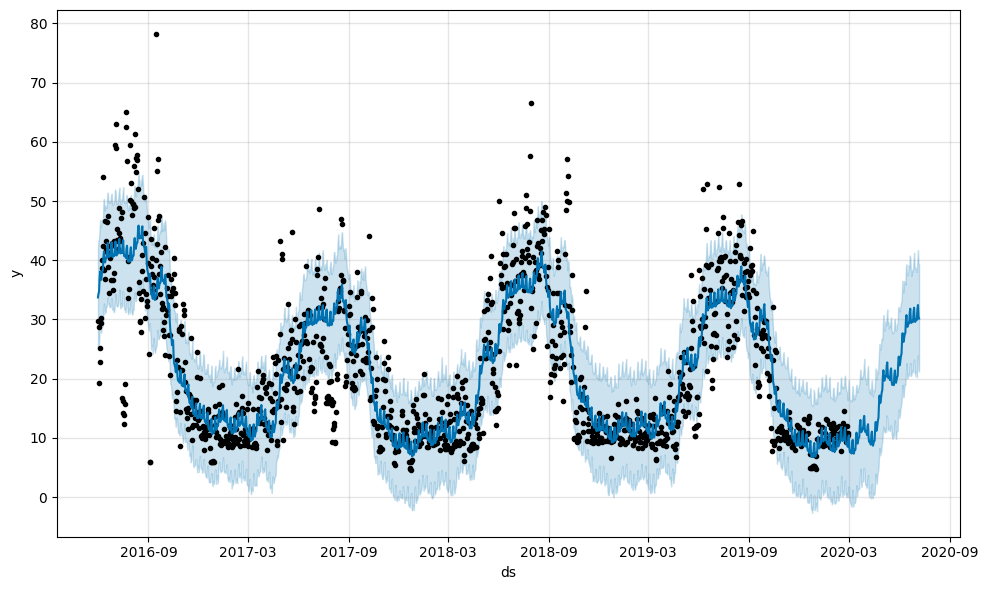

In [176]:
fig1 = model.plot(forecast)
fig1.show()

C:\Users\lucas\AppData\Local\Temp\ipykernel_16924\2835844717.py:2: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



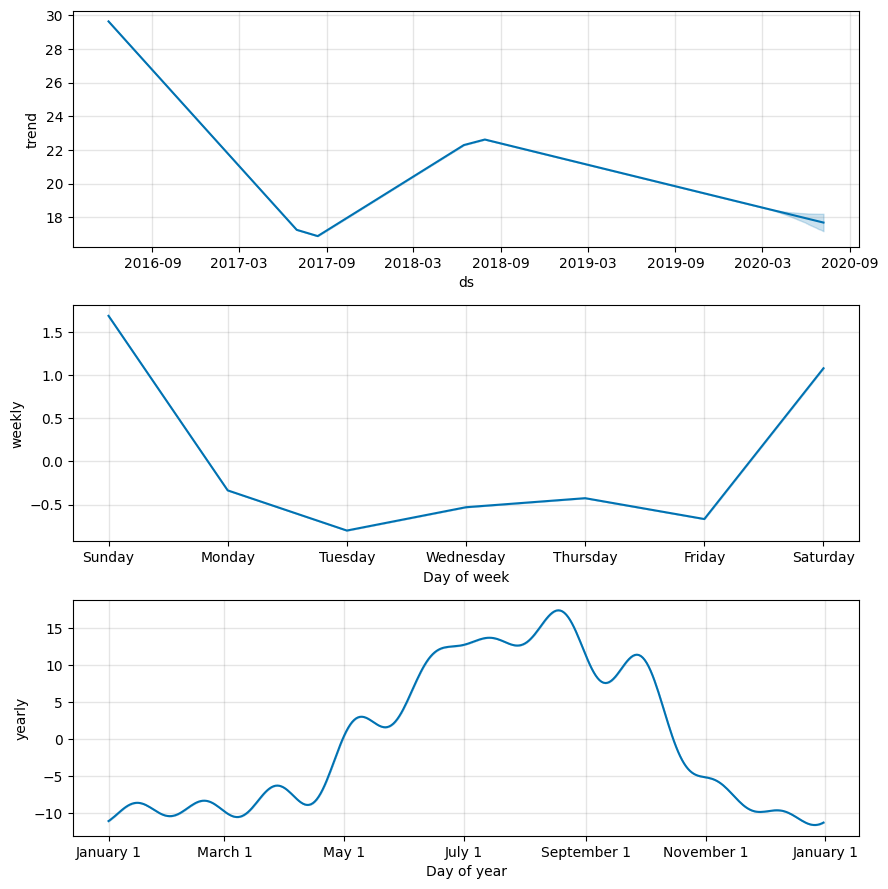

In [177]:
fig2 = model.plot_components(forecast)
fig2.show()

In [178]:
# MAE para train
train_pred = model.predict(train_data[['ds']])
mae_train = mean_absolute_error(train_data['y'], train_pred['yhat'])
print(f'MAE en conjunto de entrenamiento: {mae_train:.2f}')

# MAE para test
mae_test = mean_absolute_error(test_data['y'], forecast['yhat'][-129:])
print(f'MAE en conjunto de prueba: {mae_test:.2f}')


MAE en conjunto de entrenamiento: 4.82
MAE en conjunto de prueba: 4.93


In [179]:
error_train = train_data['y'] - train_pred['yhat']
error_test = test_data['y'] - forecast['yhat']

# Crear un DataFrame con los errores
error_train_df = pd.DataFrame({'ds': train_data['ds'], 'error': error_train, 'set': 'Train'})
error_test_df = pd.DataFrame({'ds': test_data['ds'], 'error': error_test, 'set': 'Test'})

error_df = pd.concat([error_train_df, error_test_df])
fig = px.line(x=error_df['ds'], y=error_df['error'], title='Error en la predicción', color=error_df['set'])
fig.show()


**OBSERVACIÓN**: Al observar el gráfico es posible notar un comportamiento parecido en el último experimento donde se realizaron predicciones. Se observa que si bien los resultados mejoran respecto al primer experimento, y la estacionalidad del error disminuye, y ya no se presentan curvas fuertes como en el primer caso, aún hay un componente estacional donde todos los años alrededor de Julio se presenta un aumento en el error. Esto al igual que antes, es producido por la varianza mucho más alta en Julio, y el comportamiento mucho más erratico de los datos en ese periodo.

## 1.4 Incluyendo Regresores [5 puntos]

<center>
<img src ="https://i.redd.it/64hwjftunjjd1.gif" width = 400 />

Con los nuevos resultados obtenidos del modelo Prophet, usted le aconseja a Homero que puede mejorar sus predicciones al incluir regresores en el modelo, es decir, variables adicionales que pueden influir en la variable objetivo, en este caso, el consumo energético. Homero encuentra que es una buena idea y va en busca de ayuda donde el Profesor Frink, un destacado Científico de Springfield. Para suerte de Homero, Frink tenía un estudio reciente que registra las condiciones climáticas en Springfield, en el mismo intervalo de tiempo en que Homero disponía de los datos de consumo eléctrico. Con esta nueva información, usted le recomienda a Homero que podrían utilizar esta información meteorológica proporcionada como variables exógenas al modelo.

Sin embargo, al no comprender bien la importancia de los regresores, Homero decide confiar en sus capacidades y le pide que, por favor, incluya estas variables en el modelo para evaluar su impacto en las predicciones.

Para ello, usted debe:

0. Seleccionar las variables exógenas a utilizar del archivo `datos_frink.csv`. Añada estas variables a sus conjuntos de entrenamiento y prueba mediante `merge`. [0 puntos]
1. Cree el modelo Prophet e incluya los regresores (variables exógenas) al modelo. Luego realice el entrenamiento. **Hint**: Utilice el método `.add_regressor()`. Mas información en el siguiente [Enlace](https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html#additional-regressors). [2 puntos]
2. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
3. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y de prueba. Analice sus resultados. [1 punto]
4. Grafique el error (Valor real - Valor predicho) en el conjunto de entrenamiento y de prueba. ¿Hay un comportamiento estacional en la serie? ¿Influyen estas variables en el comportamiento del consumo energético en el hogar de Homero? [1 punto]

Los datos del dataset de Frink son los siguientes:

* **date**: Fecha de medición.
* **Temp_max**: Temperatura máxima registrada durante el día (en °F).
* **Temp_avg**: Temperatura promedio registrada durante el día (en °F).
* **Temp_min**: Temperatura mínima registrada durante el día (en °F).
* **Dew_max**: Punto de rocío máximo registrado durante el día (en °F).
* **Dew_avg**: Punto de rocío promedio registrado durante el día (en °F).
* **Dew_min**: Punto de rocío mínimo registrado durante el día (en °F).
* **Hum_max**: Humedad máxima registrada durante el día (en porcentaje).
* **Hum_avg**: Humedad promedio registrada durante el día (en porcentaje).
* **Hum_min**: Humedad mínima registrada durante el día (en porcentaje).
* **Wind_max**: Velocidad máxima del viento registrada durante el día (en millas por hora, mph).
* **Wind_avg**: Velocidad promedio del viento registrada durante el día (en millas por hora, mph).
* **Wind_min**: Velocidad mínima del viento registrada durante el día (en millas por hora, mph).
* **Press_max**: Presión atmosférica máxima registrada durante el día (en pulgadas de mercurio, Hg).
* **Press_avg**: Presión atmosférica promedio registrada durante el día (en pulgadas de mercurio, Hg).
* **Press_min**: Presión atmosférica mínima registrada durante el día (en pulgadas de mercurio, Hg).

**Respuesta:**

In [180]:
df_frink = pd.read_csv('datos_frink.csv')
df_frink['date'] = pd.to_datetime(df_frink['date'])

#merge según date
train_data_frink = pd.merge(train_data, df_frink, left_on='ds', right_on='date')
test_data_frink = pd.merge(test_data, df_frink, left_on='ds', right_on='date')

train_data_frink.drop(columns='date', inplace=True)
test_data_frink.drop(columns='date', inplace=True)

In [181]:
df_with_frink = pd.merge(df, df_frink, left_on='date', right_on='date')
correlation_matrix = df_with_frink[['Energy_kWh', 'Temp_max', 'Temp_avg', 'Temp_min', 'Dew_max', 'Dew_avg', 
                                    'Dew_min', 'Hum_max', 'Hum_avg', 'Hum_min', 'Wind_max', 'Wind_avg', 
                                    'Wind_min', 'Press_max', 'Press_avg', 'Press_min']].corr()

#la correlación con respecto a la variable objetivo
target_corr = correlation_matrix['Energy_kWh'].sort_values(ascending=False)

print(target_corr)


Energy_kWh    1.000000
Temp_avg      0.720178
Temp_max      0.710673
Temp_min      0.705234
Dew_min       0.645126
Dew_avg       0.634184
Dew_max       0.606610
Hum_max       0.100471
Hum_avg      -0.022245
Press_min    -0.044568
Wind_max     -0.049319
Hum_min      -0.075223
Wind_min     -0.136839
Wind_avg     -0.209835
Press_avg    -0.291159
Press_max    -0.385739
Name: Energy_kWh, dtype: float64


In [182]:
model_regressors = Prophet()

regressors = ['Temp_avg', 'Temp_max', 'Temp_min']  #escogemos estas pues poseen correlación mayor o igual a 0.7 con target

for regressor in regressors:
    model_regressors.add_regressor(regressor)

model_regressors.fit(train_data_frink)


22:15:29 - cmdstanpy - INFO - Chain [1] start processing
22:15:29 - cmdstanpy - INFO - Chain [1] done processing


In [183]:
future_regressor = model_regressors.make_future_dataframe(periods=129)

future_regressor = future_regressor.merge(df_frink[['date', 'Temp_avg', 'Temp_max', 'Temp_min']], 
                                          left_on='ds', right_on='date', 
                                          how='left')
future_regressor.drop(columns=['date'], inplace=True)

forecast_regressors = model_regressors.predict(future_regressor)


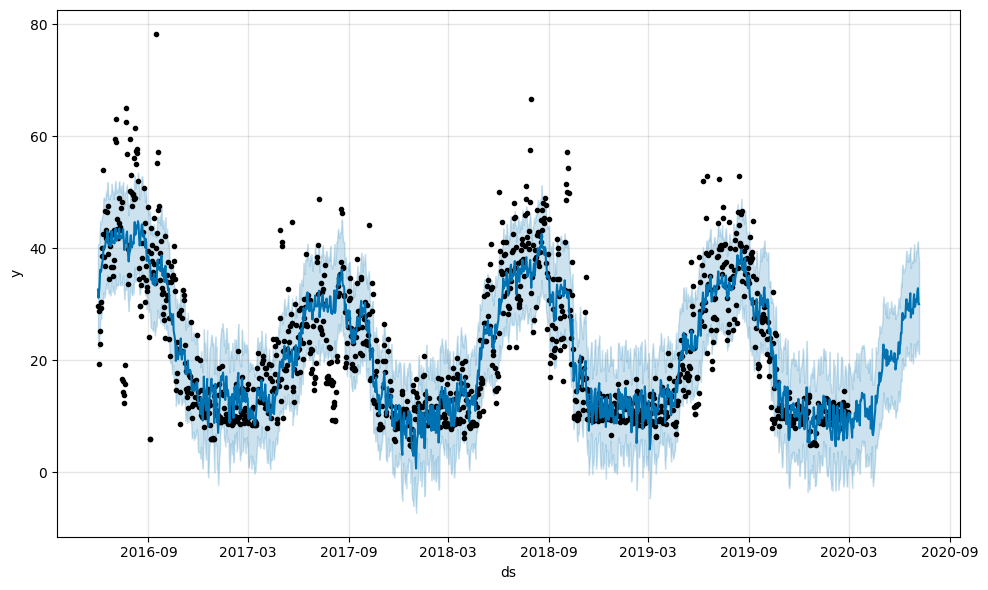

In [184]:
fig1_regressors = model_regressors.plot(forecast_regressors)

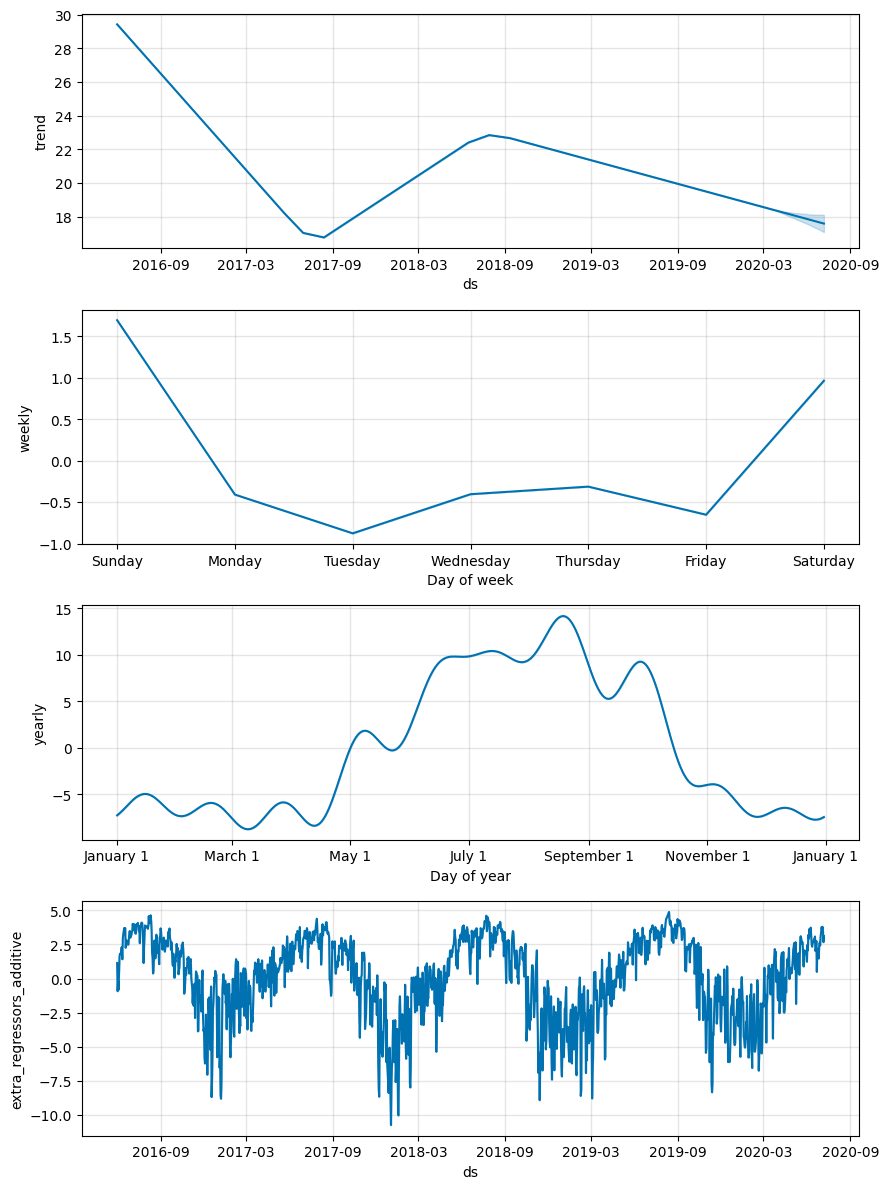

In [185]:
fig2_regressors = model_regressors.plot_components(forecast_regressors)

In [186]:
forecast_train = model_regressors.predict(train_data_frink)
y_pred_train = forecast_train['yhat'].values
y_true_train = train_data_frink['y'].values 

mae_train = mean_absolute_error(y_true_train, y_pred_train)
print(f'MAE en el conjunto de entrenamiento: {mae_train}')

forecast_test = model_regressors.predict(future_regressor)

y_pred_test = forecast_test['yhat'].values
y_true_test = test_data_frink['y'].values  # Valores reales en el conjunto de prueba

# Calcular el MAE en el conjunto de prueba
mae_test = mean_absolute_error(y_true_test, y_pred_test[-129:])
print(f'MAE en el conjunto de prueba: {mae_test}')


MAE en el conjunto de entrenamiento: 4.782362524851399
MAE en el conjunto de prueba: 4.411552130157668


**OBSERVACIÓN**: Los resultados de agregar variables exhogenas al modelo son buenos, aunque no muy potentes. Se observa que en el conjunto de prueba el MAE disminuye en un 0.5 aprox, lo que es bueno puesto que es aprox un 10% de el resultado obtenido anteriormente, sin embargo se sigue teniendo un buen margen de mejora en los resultados. En el caso del conjunto de entrenamiento los resultados mejoran bastante poco, en aprox 0.1, lo que presenta una mejora, pero no demasiado significativa.

In [187]:
error_train_best = y_true_train - y_pred_train
error_test_best = y_true_test - y_pred_test[-129:]

error_train_df = pd.DataFrame({'ds': train_data['ds'], 'error': error_train_best, 'set': 'Train'})
error_test_df = pd.DataFrame({'ds': test_data['ds'], 'error': error_test_best, 'set': 'Test'})

error_df = pd.concat([error_train_df, error_test_df])
fig = px.line(x=error_df['ds'], y=error_df['error'], title='Error en la predicción', color=error_df['set'])
fig.show()


**OBSERVACIÓN**: Se observa que de nuevo los resultados mejoran, en el sentido de que se persive una curva aun más parecida al comportamiento del ruido blanco, sin embargo se sigue observando cierto comportamiento estacional, ya que en los meses de Julio el error sigue siendo mayor que en los demás meses, y eso repitiendose anualmente.

## 1.5 Aplicando Lags [7 puntos]

<center>
<img src ="https://i.gifer.com/J45h.gif" width = 400 />

Homero, satisfecho con los resultados obtenidos, cree que aún puede mejorar el rendimiento del modelo incorporando lags de las variables exógenas. Se le ocurre que, al incluir estos lags, podría identificar cómo los valores pasados de las variables influyen en la evolución de la variable objetivo. Con esta idea en mente, Homero solicita su ayuda para encontrar y aplicar los lags adecuados a las variables exógenas de manera efectiva.

Para ello, a usted se le pide que:

1. Calcule la `Autocorrelación Parcial` de las variables exógenas `avg` que usted haya considerado. Por ejemplo: `Temp_avg, Dew_avg, etc`. Luego determine la cantidad de rezagos (lags) que se va a aplicar a cada una de las variables. Justifique. [1 punto]

2. Aplique los lags determinados en el paso anterior e incluyalos como variables en los conjuntos train y test. [1 punto]

3. Impute los valores nulos de los nuevos atributos lags mediante la media de cada variable. [1 punto]

4. Cree y entrene el modelo Prophet e incluya las variables exógenas y adicionalmente sus respectivos lags al modelo. [1 punto]

5. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
6. Calcule el `MAE` de la predicción en el conjunto de prueba y en el de entrenamiento. Analice sus resultados. [1 punto]
7. Grafique el error (Valor real - Valor predicho) en el conjunto de entrenamiento y en el de prueba. ¿Hay un comportamiento estacional en la serie? ¿Como afecta la inclusión de los lags en el desempeño del modelo? [1 punto]


**Respuesta:**

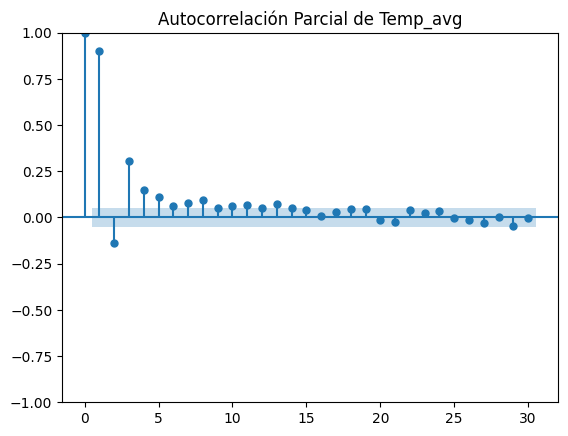

In [188]:
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

plot_pacf(df_frink['Temp_avg'].dropna(), lags=30, alpha = 0.05)
plt.title("Autocorrelación Parcial de Temp_avg")
plt.show()

La mayor autocorrelación se tiene para  $lag = 1$, pero sigue siendo razonable para $lag = 3$ o $lag = 4$  

In [189]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer

def get_lags(X):
    '''
    Retorna variables temporales basadas en lags para varias columnas.
    '''
    lag_features = pd.DataFrame(index=X.index)
    
    for col in X.columns:
        lag_features[f'{col}_lag_1'] = X[col].shift()  # Lag 1
    

    imputer = SimpleImputer(strategy='mean')
    lag_features_imputed = pd.DataFrame(imputer.fit_transform(lag_features), 
                                        index=lag_features.index, 
                                        columns=lag_features.columns)
    
    return lag_features_imputed

LagsTransformer = FunctionTransformer(get_lags)


In [190]:
df_frink_temp_lag = LagsTransformer.transform(df_frink[['Temp_avg']])
df_frink_lag = pd.concat([df_frink, df_frink_temp_lag], axis=1)

In [191]:
# Seleccionamos solo la columna 'Temp_avg' para aplicar el lag
train_temp_avg = train_data_frink[['Temp_avg']]
test_temp_avg = test_data_frink[['Temp_avg']]

# Aplicamos el LagsTransformer
train_temp_avg_lag = LagsTransformer.transform(train_temp_avg)
test_temp_avg_lag = LagsTransformer.transform(test_temp_avg)

# Unimos los dataframes originales con los de los lags
train_data_frink_lag = pd.concat([train_data_frink, train_temp_avg_lag], axis=1)
test_data_frink_lag = pd.concat([test_data_frink, test_temp_avg_lag], axis=1)


In [192]:
model_regressors_lags = Prophet()

regressors_lag = ['Temp_avg', 'Temp_max', 'Temp_min', 'Temp_avg_lag_1']  

for regressor in regressors_lag:
    model_regressors_lags.add_regressor(regressor)

model_regressors_lags.fit(train_data_frink_lag)


22:15:31 - cmdstanpy - INFO - Chain [1] start processing
22:15:31 - cmdstanpy - INFO - Chain [1] done processing


In [193]:
future_regressor_lag = model_regressors_lags.make_future_dataframe(periods=129)

future_regressor_lag = future_regressor_lag.merge(df_frink_lag[['date', 'Temp_avg', 'Temp_max', 'Temp_min', 'Temp_avg_lag_1']], 
                                          left_on='ds', right_on='date', 
                                          how='left')
future_regressor_lag.drop(columns=['date'], inplace=True)

forecast_regressors_lag = model_regressors_lags.predict(future_regressor_lag)


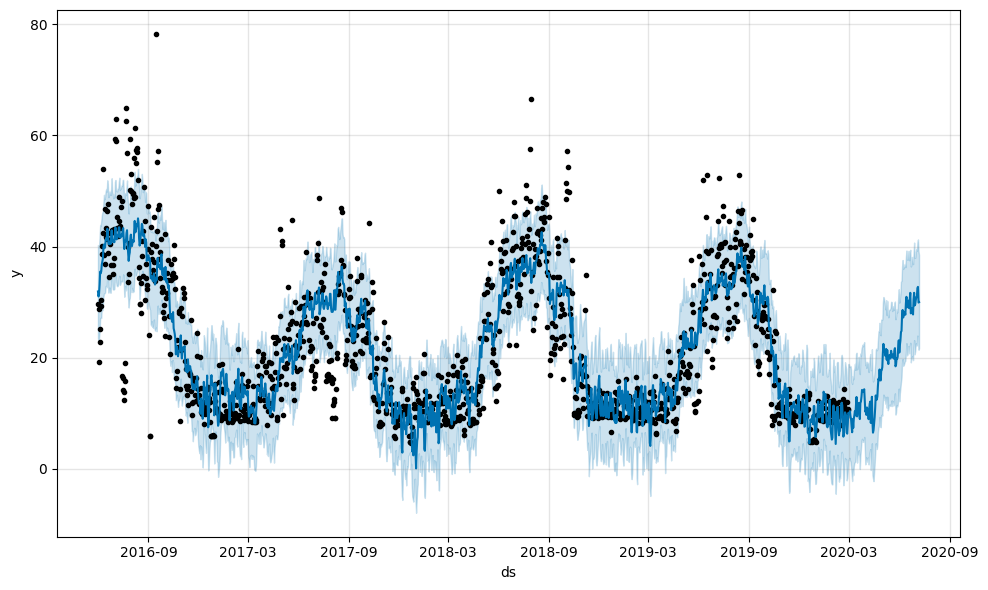

In [194]:
fig1_regressors_lag = model_regressors_lags.plot(forecast_regressors_lag)

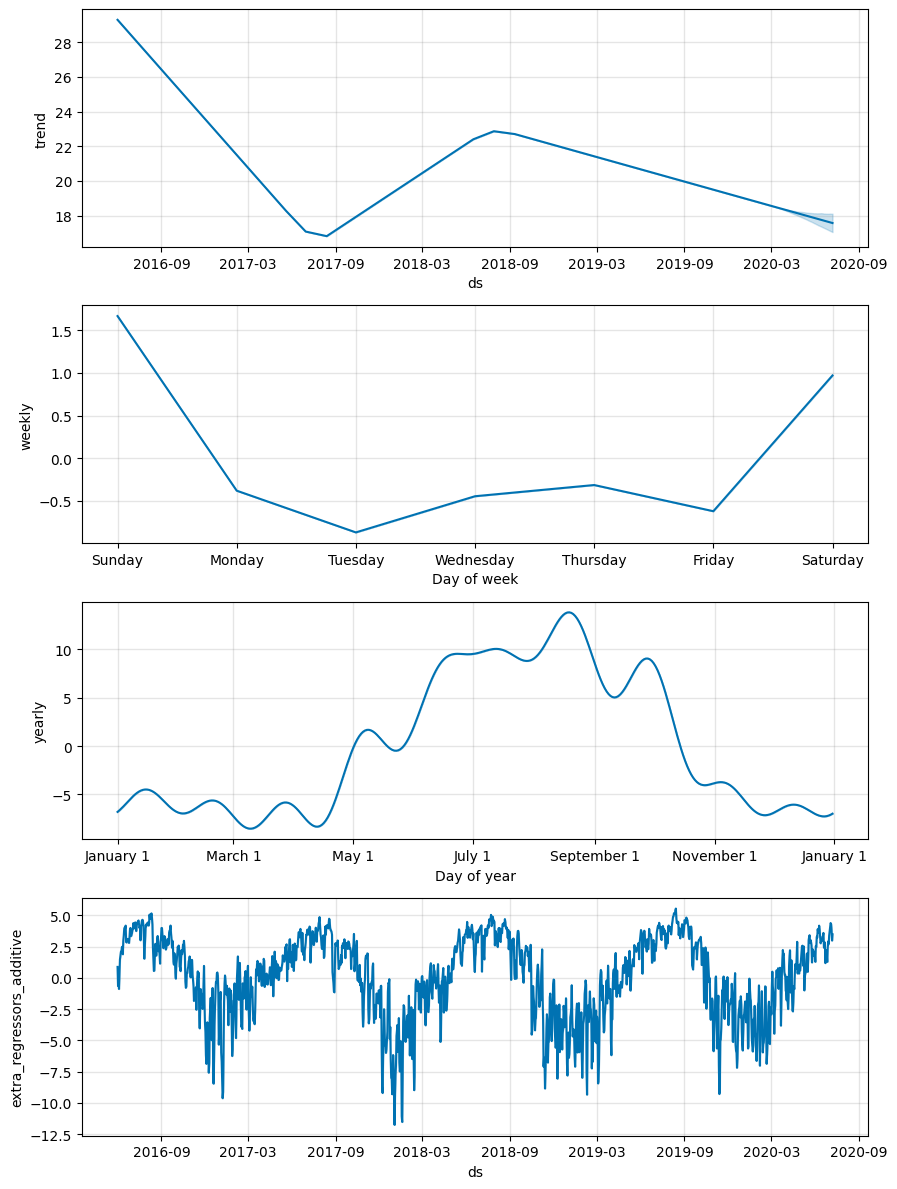

In [195]:
fig2_regressors_lag = model_regressors_lags.plot_components(forecast_regressors_lag)

In [196]:
forecast_train_lag = model_regressors_lags.predict(train_data_frink_lag)
y_pred_train_lag = forecast_train_lag['yhat'].values
y_true_train_lag = train_data_frink_lag['y'].values 

mae_train = mean_absolute_error(y_true_train_lag, y_pred_train_lag)
print(f'MAE en el conjunto de entrenamiento: {mae_train}')

forecast_test_lag = model_regressors_lags.predict(future_regressor_lag)

y_pred_test_lag = forecast_test_lag['yhat'].values
y_true_test_lag = test_data_frink_lag['y'].values  # Valores reales en el conjunto de prueba

# Calcular el MAE en el conjunto de prueba
mae_test = mean_absolute_error(y_true_test_lag, y_pred_test_lag[-129:])
print(f'MAE en el conjunto de prueba: {mae_test}')


MAE en el conjunto de entrenamiento: 4.763303401616172
MAE en el conjunto de prueba: 4.389840093679691


**OBSEVACIÓN**: Se observa que los resultados mejoran pero por bastante poco. Tanto para el conjunto de prueba como para el conjunto de entrenamiento la mejora es de alrededor de 0.02. Esto demuestra que en este caso no es muy efectivo agregar lags a las variables exogenas, ya que no se observa una mejora significativa en los resultados, aunque siempre vale la pena probarlo y hacerlo, porque sigue siendo una mejora aunque sea pequeña.

In [197]:
error_train_lag = y_true_train_lag - y_pred_train_lag
error_test_lag = y_true_test_lag - y_pred_test_lag[-129:]

error_train_df_lag = pd.DataFrame({'ds': train_data['ds'], 'error': error_train_lag, 'set': 'Train'})
error_test_df_lag = pd.DataFrame({'ds': test_data['ds'], 'error': error_test_lag, 'set': 'Test'})

error_df_lag = pd.concat([error_train_df_lag, error_test_df_lag])
fig = px.line(x=error_df_lag['ds'], y=error_df_lag['error'], title='Error en la predicción', color=error_df_lag['set'])

fig.show()

**OBSERVACIÓN**: Al igual que anteriormente, se observan leves curvas aun estacionarias en los errores. En Julio se sigue observando un aumento en el error probablemente explicable por la alta varianza de los datos en ese periodo. Es posible que al integrar Lags al modelo no pueda mejorar mucho dado que se incluyen muy pocos lags (aunque esto fue porque ya el segundo lag no presentaba una autocorrelación significativa).

## 1.6 Optimizando Prophet [6 puntos]

<center>
<img src ="https://i.gifer.com/BKlg.gif" width = 500 />

Homero, contento con sus resultados, decide compartir su trabajo en LinkedIn. Sin embargo, justo antes de realizar la publicación, su hija Lisa Simpson le comenta que su modelo podría mejorar aún más mediante la optimización de hiperparámetros. Aunque Homero no entiende muy bien a qué se refiere Lisa, decide confiar en su conocimiento y le pide ayuda para implementar la optimización.

Lisa le prepara una función llamada optimize_prophet, que recibe como entrada el registro histórico, los datos a predecir (futuros), el nombre de las variables exógenas y una grilla de hiperparámetros que se desea modificar.

Después de varios intentos, Homero no logra utilizar la función de Lisa y, desesperado por publicar sus resultados en internet, se acerca a usted en busca de ayuda.

Para ello, usted decide realizar los siguientes pasos:

1. Crear una grilla donde se modifiquen los siguientes hiperparámetros: `changepoint_prior_scale`, `seasonality_prior_scale`, `seasonality_mode`, `changepoint_range` y encuentre los hiperparámetros que optimicen el `MAE`. `Nota:` Utilice la función `optimize_prophet()` dada en el enunciado. [1 punto]
2. Crear y entrenar un modelo Prophet utilizando los mejores parámetros encontrados, incluyendo regresores (variables exógenas). [2 puntos]
3. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
4. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y en el de prueba. [1 punto]
5. Grafique el error (Valor real - Valor predicho) en ambos conjuntos. Analice sus resultados. [1 punto]


In [198]:
#NO MODIFICAR ESTA CELDA

import itertools
import numpy as np
import pandas as pd
from tqdm import tqdm
import logging

# Silenciar el logging de Prophet
logging.getLogger('prophet').setLevel(logging.ERROR)
logging.getLogger('cmdstanpy').setLevel(logging.ERROR)


def optimize_prophet(df, df_to_pred, features, param_grid ):
  '''
  Función que recibe como entrada:
  -df: data entrenamiento.
  -df_to_pred: data a predecir (test).
  -features: lista de variables exógenas.
  -param_grid: grilla de hiperparámetros.

  Retorna:
  -tuning_results: Dataframe con resultados de la optimización.
  -best_params: Diccionario de mejores parámetros encontrados.
  '''

  # Generate all combinations of parameters
  all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
  MAEs = []  # Store the MAEs for each params here

  # Use tqdm to add a progress bar to the parameter tuning loop
  for params in tqdm(all_params, desc="Tuning Prophet parameters"):
      m = Prophet(**params)  # Fit model with given params
      for feature in features:
          m.add_regressor(feature)
      m.fit(df)

      # Prepare future dataframe
      df_prop = m.make_future_dataframe(periods=len(df_to_pred))
      df_feat = pd.concat([df[features], df_to_pred[features]]).reset_index(drop=True)
      df_prop[features] = df_feat[features]

      # Make predictions
      forecast = m.predict(df_prop)
      forecast_pred = forecast[forecast['ds'].isin(df_to_pred['ds'])].reset_index(drop=True)

      # Calculate MAE for the predictions
      mae_pred = mean_absolute_error(df_to_pred['y'], forecast_pred['yhat'])
      MAEs.append(mae_pred)

  # Find the best parameters
  tuning_results = pd.DataFrame(all_params)
  tuning_results['MAEs'] = MAEs
  tuning_results = tuning_results.sort_values(by='MAEs', ascending=True)
  best_params = all_params[np.argmin(MAEs)]
  return tuning_results, best_params

**Respuesta:**

In [199]:
param_grid = {
    'changepoint_prior_scale': [0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.1, 1.0, 10.0],
    'seasonality_mode': ['additive', 'multiplicative'],
    'changepoint_range': [0.8, 0.9]
}

# Lista de variables exógenas (regressors)
features = ['Temp_avg', 'Temp_max', 'Temp_min', 'Temp_avg_lag_1']

tuning_results, best_params = optimize_prophet(train_data_frink_lag, test_data_frink_lag, features, param_grid)
print("Mejores parámetros encontrados:", best_params)


Tuning Prophet parameters: 100%|██████████| 36/36 [00:15<00:00,  2.29it/s]

Mejores parámetros encontrados: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.1, 'seasonality_mode': 'additive', 'changepoint_range': 0.9}


In [200]:
tuning_results.head()

,changepoint_prior_scale,seasonality_prior_scale,seasonality_mode,changepoint_range,MAEs
1,0.01,0.1,additive,0.9,3.995132
9,0.01,10.0,additive,0.9,3.995498
3,0.01,0.1,multiplicative,0.9,3.996805
0,0.01,0.1,additive,0.8,3.998777
8,0.01,10.0,additive,0.8,4.000685


In [201]:
best_prophet_model = Prophet(**best_params)

for feature in features:
    best_prophet_model.add_regressor(feature)

# Entrenar el modelo
best_prophet_model.fit(train_data_frink_lag)


In [202]:
future_best = best_prophet_model.make_future_dataframe(periods=129)

future_best = future_best.merge(df_frink_lag[['date', 'Temp_avg', 'Temp_max', 'Temp_min', 'Temp_avg_lag_1']], 
                                          left_on='ds', right_on='date', 
                                          how='left')
future_best.drop(columns=['date'], inplace=True)

forecast_best = best_prophet_model.predict(future_regressor_lag)


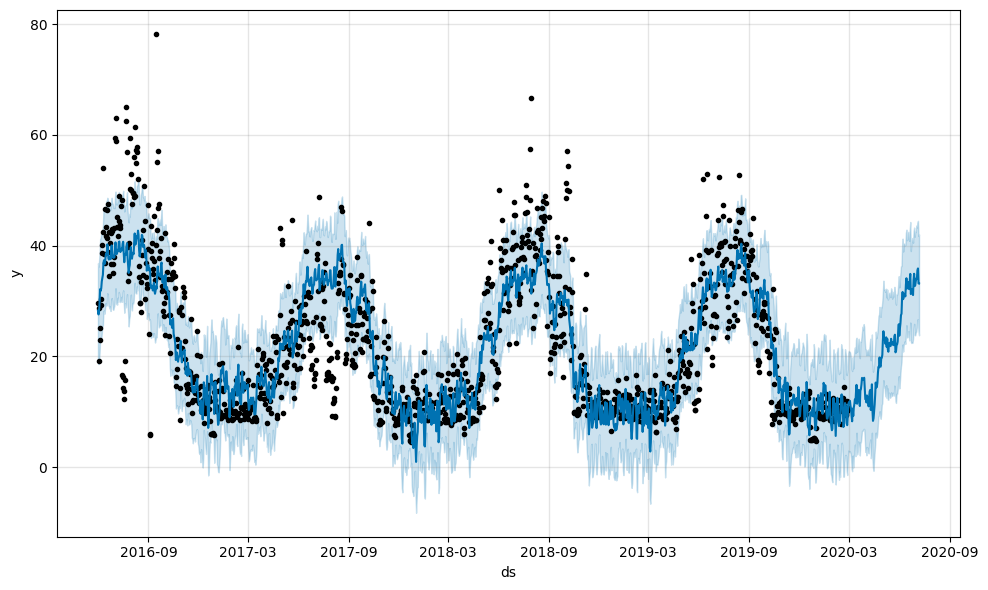

In [203]:
fig1_best = best_prophet_model.plot(forecast_best)

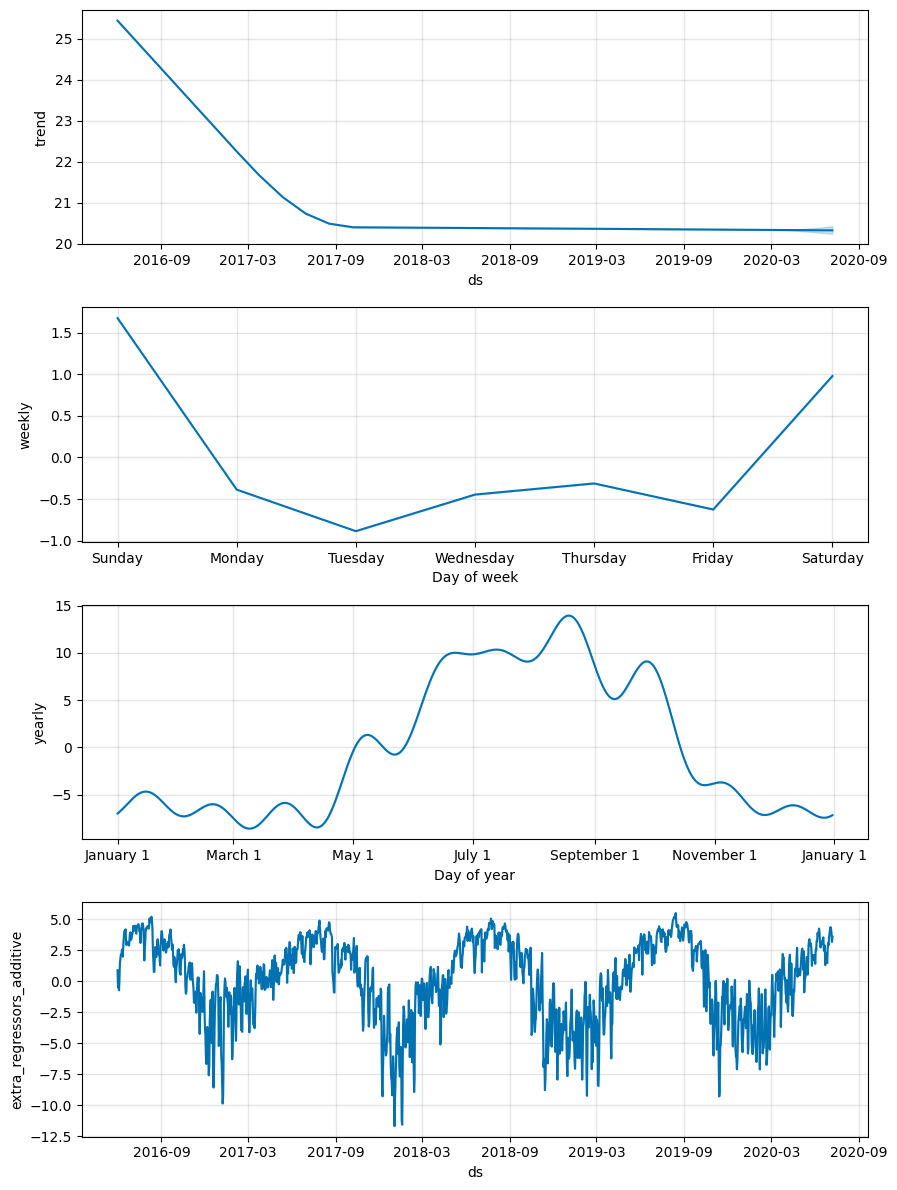

In [204]:
fig2_best = best_prophet_model.plot_components(forecast_best)

In [205]:
forecast_train_best = best_prophet_model.predict(train_data_frink_lag)
y_pred_train_best = forecast_train_best['yhat'].values
y_true_train_best = train_data_frink_lag['y'].values 

mae_train_best = mean_absolute_error(y_true_train_best, y_pred_train_best)
print(f'MAE en el conjunto de entrenamiento: {mae_train_best}')

forecast_test_best = best_prophet_model.predict(future_regressor_lag)

y_pred_test_best = forecast_test_best['yhat'].values
y_true_test_best = test_data_frink_lag['y'].values  

# Calcular el MAE en el conjunto de prueba
mae_test = mean_absolute_error(y_true_test_best, y_pred_test_best[-129:])
print(f'MAE en el conjunto de prueba: {mae_test}')


MAE en el conjunto de entrenamiento: 5.066106275992383
MAE en el conjunto de prueba: 3.984454585935284


In [206]:
error_train_best = y_true_train_best - y_pred_train_best
error_test_best = y_true_test_best - y_pred_test_best[-129:]

error_train_df = pd.DataFrame({'ds': train_data['ds'], 'error': error_train_best, 'set': 'Train'})
error_test_df = pd.DataFrame({'ds': test_data['ds'], 'error': error_test_best, 'set': 'Test'})

error_df = pd.concat([error_train_df, error_test_df])
fig = px.line(x=error_df['ds'], y=error_df['error'], title='Error en la predicción', color=error_df['set'])
fig.show()

**OBSERVACIÓN**: Finalmente, al optimizar los hiperparámetros se observa una mejora bastante considerable en el conjunto de testing, ya que baja de alrededor de 4.3 a 3.8, lo que es una mejora de alrededor de 0.5, lo que es bastante significativo. En el caso del conjunto de entrenamiento, de forma un poco extraña, pasa lo contrario ya que el MAE aumenta algunos puntos. Esto puede deberse a que al ajustar los hiperparametros al conjunto de testing, se ajusta de mejor manera a los datos de testing, generalizando mejor, y evitando el overfitting.

# **2. Sistemas de Recomendación (30 puntos)**

## Homero contra la Prohibición

<center>
<img src ="https://i.ytimg.com/vi/rMSXXuhZjYY/maxresdefault.jpg" width = 500 />

En Springfield, el caos estalló cuando las autoridades prohibieron el alcohol. Pero como siempre, donde otros ven problemas, Homero Simpson ve oportunidades. Decidido a mantener las fiestas vivas, se convirtió en el Barón de la Cerveza en un abrir y cerrar de ojos. Con la ayuda de su buen amigo Moe el cantinero, Homero obtuvo un valioso dataset llamado `cervezas.csv`, que contiene valoraciones de los ciudadanos de Springfield sobre distintas cervezas. Homero quiere asegurarse de ofrecer las cervezas más apreciadas para mantener a su clientela oculta y feliz, mientras eludía la mirada del estricto Elio Pez. Por ende, Homero lo contacta para solicitar de su ayuda en esta nueva labor.

El dataset contiene los siguientes atributos:

  * userId: Identificador de los ciudadanos/usuarios
  * beerId: Identificador único de cada cerveza
  * rating: Evaluación otorgada por el ciudadano a la cerveza, en un rango de 1.0 a 5.0.
  * beerName: Nombre de la cerveza
  * beerStyle: Tipo de Cerveza.



In [67]:
!pip install surprise


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [68]:
# Librerias extras
from sklearn.preprocessing import LabelEncoder

from surprise import accuracy
from surprise.reader import Reader
from surprise.dataset import Dataset
from surprise.model_selection import train_test_split
from surprise.prediction_algorithms.knns import KNNBasic
from surprise.prediction_algorithms.matrix_factorization import SVD
from surprise.accuracy import mae
from surprise import NMF
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import pandas as pd
from copy import deepcopy

## Carga de los datos [0 puntos]

Cargue el dataset `cervezas.csv` y realice una breve exploración de los datos. ¿Hay valores nulos? ¿Cuantos cervezas se estan evaluando? ¿Cuantos ciudadanos participaron de esta evaluación?

In [69]:
#CODIGO AQUI
df = pd.read_csv('cervezas.csv')
df.head()

,userId,beerId,rating,beerName,beerStyle
0,144,995,3.0,Mai Bock,Maibock / Helles Bock
1,63,58695,4.0,Hop In The Dark Cascadian Dark Ale,American Black Ale
2,147,4083,5.0,Stone Ruination IPA,American Double / Imperial IPA
3,4261,40310,3.0,Noël Des Géants,Herbed / Spiced Beer
4,140,1904,5.0,Sierra Nevada Celebration Ale,American IPA


In [70]:
df.shape

(295059, 5)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295059 entries, 0 to 295058
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     295059 non-null  int64  
 1   beerId     295059 non-null  int64  
 2   rating     295059 non-null  float64
 3   beerName   295059 non-null  object 
 4   beerStyle  295059 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.3+ MB


In [72]:
df.isnull().sum()

userId       0
beerId       0
rating       0
beerName     0
beerStyle    0
dtype: int64

In [73]:
df['beerId'].unique().shape

(3747,)

In [74]:
df['userId'].unique().shape

(706,)

**OBSERVACIONES**:
- No se encontraron valores nulos
- Se tienen 3747 cervezas distintas evaluadas
- Se tienen 706 ciudadanos distintos que participaron de la evaluación
- Se tienen 295059 evaluaciones en total

## 2.1 Caracterización Inicial [3 puntos]

Antes de entrenar nuestro sistema recomendador, es necesario caracterizar los datos disponibles y de esta manera tener un mejor entendimiento del problema a resolver. Para esto, se le pide lo siguiente:

1. Genere gráficos y/o estadística descriptiva con los datos. Utilice su análisis para responder las siguientes preguntas: [2 puntos]
  - ¿Cuantos *usuarios* hay en los datos?
  - ¿Cuantos *productos* hay en los datos?
  - ¿Cuantas *calificaciones* hay en los datos?
  - ¿Cuantas *calificaciones* faltantes hay en los datos?
  - ¿Cual es la media de las *calificaciones* entregadas por los usuarios? ¿Cómo cambia esto a través de los productos?  
2. Transforme los datos entregados a una matriz (usuario, producto) y muestre sus resultados. [1 punto]

In [75]:
cantidad_usuarios = df['userId'].unique().shape[0]
cantidad_cervezas = df['beerId'].unique().shape[0]
cantidad_ratings = df['rating'].unique().shape[0]

print(f'Cantidad de usuarios: {cantidad_usuarios}')
print(f'Cantidad de cervezas: {cantidad_cervezas}')
print(f'Cantidad de ratings: {cantidad_ratings}')

Cantidad de usuarios: 706
Cantidad de cervezas: 3747
Cantidad de ratings: 9


In [76]:
print(f'Cantidad de valores faltantes en la columna "rating": {df["rating"].isnull().sum()}')

Cantidad de valores faltantes en la columna "rating": 0


In [77]:
df['rating'].value_counts(normalize=True)

rating
4.0    0.373695
4.5    0.217753
3.5    0.182055
3.0    0.096127
5.0    0.064187
2.5    0.032336
2.0    0.021108
1.5    0.006792
1.0    0.005948
Name: proportion, dtype: float64

**OBSERVACIÓN**: Se observa que los datos poseen una gran concentración alrededor del rating 4.

In [78]:
df['rating'].describe()

count    295059.000000
mean          3.860367
std           0.702807
min           1.000000
25%           3.500000
50%           4.000000
75%           4.500000
max           5.000000
Name: rating, dtype: float64

In [79]:
px.histogram(df, x='rating', title='Distribución de Ratings')

**OBSERVACIÓN**: Se comprueba lo visto más arriba, que los datos se concentran alrededor de la nota 4. El gráfico muestra como las notas se concentran en la parte superior de la escala, y poseen una cola larga en la parte inferior.

In [80]:
mean_rating_product = df.groupby('beerName')['rating'].mean().sort_values(ascending=False)
mean_rating_product.head()

beerName
Citra DIPA                  4.669492
Trappist Westvleteren 12    4.666129
Cantillon Blåbær Lambik     4.654762
Live Oak HefeWeizen         4.639706
Heady Topper                4.639344
Name: rating, dtype: float64

Para observar un poco mejor la distribución de los promedios de las calificaciones, usaremos un scatterplot (un histograma habría sido útil, sin embargo son demasiados tipos de cervezas por lo que sobrecargaría el histograma de colores).

In [81]:
px.scatter(x=mean_rating_product.index, y=mean_rating_product, title='Promedio de rating por cerveza')

**OBSERVACIÓN**: De aquí se puede observar que los promedios de los ratings de las cervezas varían mucho, yendo desde las notas máximas (cercana a 5), hasta llegar a las notas mínimas (cercanas a 1).

In [82]:
ratings_matrix = df.pivot_table(index='userId', columns='beerId', values='rating')
ratings_matrix.head()

beerId,5,6,7,9,10,11,14,15,17,19,...,74491,74530,74548,74579,74634,74827,74904,74986,75013,75086
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.395,3.765217,3.256849,3.478261,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,3.791908,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,3.431818,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,3.892157,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2.2 Método Basado en Contenido [4 puntos]

<center>
<img src ="https://is1-ssl.mzstatic.com/image/thumb/WfNa_TwFpJoTWXQmU-BrbA/1200x675.jpg" width = 500 />

Como primera tarea, Homero le pide centrarse en las características de las cervezas y no en la interacción de los ciudadanos con esta. Adicionalmente, Homero esta buscando nuevas cervezas para su consumo personal, donde usted pudo notar que Homero esta identificado como `userId = 100` en el dataset. Por ende, Homero le pide las siguientes acciones:

1. Cree un dataframe que contenga las características de las cervezas, excluyendo las evaluaciones de los ciudadanos. `Nota:` No considere valores duplicados. [1 punto]
2. Implemente el método Bag of Words para procesar la columna `beerStyle`. Para ello, transforme las palabras a minúsculas, elimine stopwords en inglés y filtre las palabras que aparezcan en 10 documentos como mínimo. Guarde su resultado como un DataFrame. [1 punto].
> `Nota:` Le puede ser útil esta [documentacion](https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) y el método `.get_feature_names_out()`.
3. Cree una función que imprima las top 5 cervezas similares a `Chocolate Porter`, utilizando como medida de similitud la similitud coseno. [1 punto]
4. Identifique la cerveza mejor evaluada por Homero (`userId = 100`) y obtenga las top 5 cervezas similares a esa cerveza. [1 punto]

**Respuesta:**

In [83]:
#CODIGO AQUI
df_beers = df[['beerId', 'beerName', 'beerStyle']].drop_duplicates().reset_index(drop=True)
df_beers.head()

,beerId,beerName,beerStyle
0,995,Mai Bock,Maibock / Helles Bock
1,58695,Hop In The Dark Cascadian Dark Ale,American Black Ale
2,4083,Stone Ruination IPA,American Double / Imperial IPA
3,40310,Noël Des Géants,Herbed / Spiced Beer
4,1904,Sierra Nevada Celebration Ale,American IPA


In [84]:
df_beers.head()

,beerId,beerName,beerStyle
0,995,Mai Bock,Maibock / Helles Bock
1,58695,Hop In The Dark Cascadian Dark Ale,American Black Ale
2,4083,Stone Ruination IPA,American Double / Imperial IPA
3,40310,Noël Des Géants,Herbed / Spiced Beer
4,1904,Sierra Nevada Celebration Ale,American IPA


In [85]:
vectorizer = CountVectorizer(lowercase=True, stop_words='english', min_df=10)
beer_style_vect = vectorizer.fit_transform(df_beers['beerStyle']).toarray()
beer_style_df = pd.DataFrame(beer_style_vect, columns=vectorizer.get_feature_names_out())
beer_style_df.head()

,adjunct,ale,altbier,amber,american,apa,baltic,barleywine,beer,belgian,...,vienna,warmer,wee,weizenbock,wheat,wheatwine,wild,winter,witbier,zwickel
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
beer_style_df.shape

(3747, 95)

In [87]:
cosine_matrix = cosine_similarity(beer_style_df, beer_style_df)
cosine_matrix

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.28867513, ..., 0.        , 0.        ,
        0.33333333],
       [0.        , 0.28867513, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.33333333, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [88]:
cosine_matrix.shape

(3747, 3747)

In [89]:
def get_top_similarities(input_df: pd.DataFrame, beer_name: str, n=5):
    idx = input_df[input_df['beerName'] == beer_name].index[0]
    similarities = list(enumerate(cosine_matrix[idx]))
    similarities = sorted(similarities, key=lambda x: x[1], reverse=True)
    # Notemos que no se considera el primero ya que siempre será el mismo producto
    similarities = similarities[1:n+1]
    similar_products = []
    for index, similarity in similarities:
        similar_products.append((input_df.iloc[index]['beerName'], similarity))
    return similar_products

In [90]:
get_top_similarities(df_beers, 'Chocolate Porter', 5)

[('Great Lakes Edmund Fitzgerald Porter', 0.9999999999999998),
 ('Perseus Porter', 0.9999999999999998),
 ('Southampton Imperial Porter', 0.9999999999999998),
 ('Kona Coffee Macadamia Coconut Porter', 0.9999999999999998),
 ('Black Marlin Porter', 0.9999999999999998)]

In [91]:
homer_ratings = df[df['userId'] == 100].sort_values(by='rating', ascending=False)
homber_favorite_beer = homer_ratings.iloc[0]['beerName']
homber_favorite_beer

"McNeill's Firehouse Amber Ale"

In [92]:
df_beers[df_beers['beerName'] == "McNeill's Firehouse Amber Ale"]

,beerId,beerName,beerStyle
3499,325,McNeill's Firehouse Amber Ale,American Amber / Red Ale


A homer se le recomendarían las siguientes cervezas similares a `Chocolate Porter`:

In [93]:
get_top_similarities(df_beers, homber_favorite_beer, 5)

[('Grail Ale', 1.0),
 ("Santa's Private Reserve Ale", 1.0),
 ('Hemp Hop Rye Amber Ale', 1.0),
 ('Autumn Fest', 1.0),
 ('Red Rocket Ale', 1.0)]

## 2.3 Filtros Colaborativos [16 puntos]

<center>
<img src ="https://i.makeagif.com/media/2-08-2016/McmGFQ.gif" width = 400 />

Después de consolidarse como el Barón de la Cerveza en Springfield, Homero Simpson decidió llevar su negocio clandestino a otro nivel. Al ser el único proveedor de alcohol en la ciudad, quiere asegurarse de que cada cerveza que elabora sea de la mejor calidad posible. Para lograrlo, planea usar las evaluaciones pasadas que los ciudadanos de Springfield han registrado sobre las distintas cervezas. Inspirado por los consejos de su amigo Moe, Homero se enteró de que puede implementar un sistema de recomendación basado en filtros colaborativos.

Ahora, Homero necesita de su ayuda para diseñar y elaborar distintos sistemas de filtros colaborativos que le permitan continuar con su reinado cervecero.

### 2.3.1 Filtros Colaborativos Basados en Memoria [8 puntos]

Para este tipo de filtros, Homero le pide lo siguiente:

1. Transforme el DataFrame de `pandas` a Dataset de `surprise`. `Hint`: Utilice solamente los identificadores de ciudadano, cerveza y rating. ¿Importa el orden? [1 punto]
2. Genere un conjunto de entrenamiento y uno de prueba, asegurando que el 30% de los datos sea destinado al conjunto de prueba. No olvide fijar una semilla para garantizar reproducibilidad. [1 punto]
3. Entrene un modelo de **KNN basado en usuarios** utilizando la `similitud coseno`. Luego realice predicciones en el conjunto de prueba. `Nota`: Le puede ser útil la siguiente [documentación](https://surprise.readthedocs.io/en/stable/knn_inspired.html) [2 puntos]
4. Calcule el MAE (Mean Absolute Error) de las predicciones realizadas por el modelo y muestre las predicciones en un DataFrame para su análisis. `Nota:` Le puede ser útil la siguiente [documentación](https://surprise.readthedocs.io/en/stable/accuracy.html#surprise.accuracy.mae) [2 puntos]
5. Repita los pasos 3 y 4 pero utilizando un modelo de **KNN basado en los productos**. [2 puntos]

**Respuesta:**

In [94]:
#CODIGO AQUI
reader = Reader(rating_scale = (0, 5))
df_base = df[['userId', 'beerId', 'rating']].copy()
dataset = Dataset.load_from_df(df_base, reader)
dataset

Notemos que el orden de las columnas es muy importante, ya que en Surprise, se asume que el orden de las columnas es: `userID`, `itemID`, `rating`.

In [95]:
trainset, testset = train_test_split(dataset, test_size = 0.3, random_state = 19)
trainset

In [96]:
testset[:5]

[(96, 40999, 4.0),
 (192, 74123, 4.0),
 (751, 45849, 4.5),
 (22, 34, 4.5),
 (220, 1372, 4.0)]

In [97]:
knn_basic = KNNBasic(sim_options={'name': 'cosine', 'user_based': True})
knn_basic.fit(trainset)

predictions = knn_basic.test(testset)
predictions_df = pd.DataFrame(predictions)
predictions_df

Computing the cosine similarity matrix...
Done computing similarity matrix.


,uid,iid,r_ui,est,details
0,96,40999,4.0,3.812500,"{'actual_k': 40, 'was_impossible': False}"
1,192,74123,4.0,3.612500,"{'actual_k': 40, 'was_impossible': False}"
2,751,45849,4.5,4.279412,"{'actual_k': 34, 'was_impossible': False}"
3,22,34,4.5,4.312500,"{'actual_k': 40, 'was_impossible': False}"
4,220,1372,4.0,4.037500,"{'actual_k': 40, 'was_impossible': False}"
...,...,...,...,...,...
88513,321,2269,4.0,3.950000,"{'actual_k': 40, 'was_impossible': False}"
88514,1199,5441,4.0,4.125000,"{'actual_k': 40, 'was_impossible': False}"
88515,870,33730,3.5,3.500000,"{'actual_k': 14, 'was_impossible': False}"
88516,10097,15059,4.0,3.809524,"{'actual_k': 21, 'was_impossible': False}"


In [98]:
mae(predictions)

MAE:  0.4659


0.46590647689393316

**OBSERVACIONES**: Se observa un MAE de 0.465, lo que indica que el modelo tiene un error promedio de 0.465 en las predicciones realizadas, lo que es un valor aceptable, pero mejorable considerando que las calificaciones van de 1 a 5.

In [99]:
knn_basic_prod = KNNBasic(sim_options={'name': 'cosine', 'user_based': False})
knn_basic_prod.fit(trainset)

predictions_prod = knn_basic_prod.test(testset)
predictions_prod_df = pd.DataFrame(predictions_prod)
predictions_prod_df

Computing the cosine similarity matrix...
Done computing similarity matrix.


,uid,iid,r_ui,est,details
0,96,40999,4.0,3.812500,"{'actual_k': 40, 'was_impossible': False}"
1,192,74123,4.0,3.612500,"{'actual_k': 40, 'was_impossible': False}"
2,751,45849,4.5,4.213097,"{'actual_k': 40, 'was_impossible': False}"
3,22,34,4.5,4.312500,"{'actual_k': 40, 'was_impossible': False}"
4,220,1372,4.0,4.037500,"{'actual_k': 40, 'was_impossible': False}"
...,...,...,...,...,...
88513,321,2269,4.0,3.950000,"{'actual_k': 40, 'was_impossible': False}"
88514,1199,5441,4.0,4.125000,"{'actual_k': 40, 'was_impossible': False}"
88515,870,33730,3.5,3.648868,"{'actual_k': 40, 'was_impossible': False}"
88516,10097,15059,4.0,3.862082,"{'actual_k': 40, 'was_impossible': False}"


In [100]:
mae(predictions_prod)

MAE:  0.4663


0.46628233830482524

**OBSERVACIONES**: Al evaluar el modelo basado en productos, se obtiene un MAE de 0.466, lo que indica que ambos modelos tienen un rendimiento muy similar, y mejorable.

### 2.3.2 Filtros Colaborativos Basados en Modelo [8 puntos]

Ahora Homero le pide que cambie el enfoque del tipo de filtro colaborativo a uno basado en modelo. Por ende, Homero le pide lo siguiente:

1. Entrene un modelo `NMF` , asegurándose de fijar la semilla para reproducibilidad. Luego genere predicciones para el conjunto de prueba. [2 puntos]
2. Calcule el MAE de las predicciones obtenidas y muestre los resultados de las predicciones en un DataFrame para su analisis. [1 punto]
3. Entrene un modelo `SVD` sobre el conjunto de entrenamiento. Posteriormente, genere las predicciones para el conjunto de prueba. [2 puntos]
4. Calcule el MAE de las predicciones y muestre los resultados de las predicciones en un DataFrame. [1 punto]
5. Compare los resultados de ambos modelos y seleccione el mejor a su criterio. Justifique. [2 puntos]

**Respuesta**

In [101]:
#CODIGO AQUI
nmf = NMF(random_state=19)
nmf.fit(trainset)

predictions_nmf = nmf.test(testset)
predictions_nmf_df = pd.DataFrame(predictions_nmf)
predictions_nmf_df

,uid,iid,r_ui,est,details
0,96,40999,4.0,3.717443,{'was_impossible': False}
1,192,74123,4.0,3.540512,{'was_impossible': False}
2,751,45849,4.5,4.050988,{'was_impossible': False}
3,22,34,4.5,4.154874,{'was_impossible': False}
4,220,1372,4.0,3.827993,{'was_impossible': False}
...,...,...,...,...,...
88513,321,2269,4.0,4.071623,{'was_impossible': False}
88514,1199,5441,4.0,4.199628,{'was_impossible': False}
88515,870,33730,3.5,3.623203,{'was_impossible': False}
88516,10097,15059,4.0,3.807637,{'was_impossible': False}


In [102]:
mae(predictions_nmf)

MAE:  0.4843


0.48432650223656004

In [103]:
svd = SVD(random_state=19)
svd.fit(trainset)

predictions_svd = svd.test(testset)
predictions_svd_df = pd.DataFrame(predictions_svd)
predictions_svd_df

,uid,iid,r_ui,est,details
0,96,40999,4.0,3.753331,{'was_impossible': False}
1,192,74123,4.0,3.623415,{'was_impossible': False}
2,751,45849,4.5,4.271401,{'was_impossible': False}
3,22,34,4.5,4.302221,{'was_impossible': False}
4,220,1372,4.0,3.932696,{'was_impossible': False}
...,...,...,...,...,...
88513,321,2269,4.0,4.045552,{'was_impossible': False}
88514,1199,5441,4.0,4.129853,{'was_impossible': False}
88515,870,33730,3.5,3.556495,{'was_impossible': False}
88516,10097,15059,4.0,3.786513,{'was_impossible': False}


In [104]:
mae(predictions_svd)

MAE:  0.4622


0.4622006995916502

**OBSERVACIONES**: Notemos que de los modelos entrenados, el mejor es el modelo `SVD`, ya que tiene un MAE de 0.462, mientras que el modelo `NMF` tiene un MAE de 0.48, lo que indica que el modelo `SVD` tiene un mejor rendimiento en las predicciones realizadas. Cabe destacar que este modelo también supera (aunque por muy poco) los modelos entrenados en la sección anterior.

## 2.4 El Mejor Filtro Colaborativo [7 puntos]

<center>
<img src ="https://media.giphy.com/media/citBl9yPwnUOs/giphy.gif" width = 400 />

Homero Simpson desea perfeccionar y extender su sistema de recomendaciones para cervezas en Springfield. En esta fase, busca implementar técnicas que le permitan no solo predecir las preferencias de los ciudadanos, sino también evaluar métricas que midan la eficacia de sus recomendaciones. Con el objetivo de recomendar las mejores K cervezas para usuarios específicos, Homero buscará comprender mejor cómo optimizar su sistema y satisfacer a sus clientes.

Para ello, usted ayudará a Homero realizando las siguientes labores:

1. Implemente la función `get_top_n()` que le permita extraer las `N` mejores cervezas recomendadas para cada ciudadano utilizando las predicciones generadas por el mejor modelo seleccionado en la sección anterior. Luego obtenga las `3` mejores cervezas recomendadas para Homero (`userId = 100`). `Hint`: Para cada ciudadano, elimine las predicciones duplicadas. [2 puntos]
2. Realice predicciones de rating para 5 cervezas aleatorias no evaluadas por Homero, para estimar las calificaciones que Homero podría darles. [1 punto]
3. Calcule los promedios de `precisión@k` y el `recall@k` para `k=10` y `threshold = 3.5`. Analice sus resultados. ¿Es un buen modelo? `Hint:` Utilice la función dada `precision_recall_at_k(...)`. [1 punto]
4. Calcule la `precisión@k` y el `recall@k` para valores de `k` que varíen entre 3 y 25 con paso de 1 unidad. Luego, grafique los resultados y analice el comportamiento de las curvas de precisión y recall en función de `k`. [1 punto]
5. Calcule la `precisión@k` y el `recall@k` para valores de `threshold` que varíen entre 3.0 y 4.5, con paso de 0.1. Luego, grafique los resultados y analice el comportamiento de las curvas de precisión y recall en función de `threshold`. [1 punto]
6. Finalmente utilice el mejor modelo para estimar los ratings faltantes. Muestre sus resultados en una matriz (usuario, producto) sin valores nulos. [1 punto]



In [105]:
#NO MODIFICAR ESTA CELDA
def precision_recall_at_k(predictions, k=10, threshold=3.5):

    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))
    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])
        n_rel_and_rec_k = sum(
            ((true_r >= threshold) and (est >= threshold))
            for (est, true_r) in user_ratings[:k]
        )
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    return precisions, recalls

**Respuesta:**

In [106]:
#CODIGO AQUI
def get_top_n(predictions, userId: int, n:int = 10):
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        if uid == userId:
            top_n[uid].append((iid, est))
    # eliminamos duplicados
    top_n[userId] = list(set(top_n[userId]))
    top_n[userId].sort(key=lambda x: x[1], reverse=True)
    return top_n[userId][:n]

get_top_n(predictions, userId = 100, n = 5)

[(325, 3.9375),
 (1393, 3.9210526315789473),
 (48798, 3.8125),
 (1814, 3.75),
 (1884, 3.6923076923076925)]

In [107]:
full_trainset = dataset.build_full_trainset() # primero separamos los (usuario, producto) con ratings
missing_ratings = full_trainset.build_anti_testset()
missing_ratings

[(144, 58695, 3.8603669096689135),
 (144, 4083, 3.8603669096689135),
 (144, 40310, 3.8603669096689135),
 (144, 1904, 3.8603669096689135),
 (144, 409, 3.8603669096689135),
 (144, 16858, 3.8603669096689135),
 (144, 25061, 3.8603669096689135),
 (144, 14309, 3.8603669096689135),
 (144, 13906, 3.8603669096689135),
 (144, 59145, 3.8603669096689135),
 (144, 2931, 3.8603669096689135),
 (144, 188, 3.8603669096689135),
 (144, 1696, 3.8603669096689135),
 (144, 619, 3.8603669096689135),
 (144, 811, 3.8603669096689135),
 (144, 1792, 3.8603669096689135),
 (144, 1157, 3.8603669096689135),
 (144, 41716, 3.8603669096689135),
 (144, 38334, 3.8603669096689135),
 (144, 4924, 3.8603669096689135),
 (144, 5068, 3.8603669096689135),
 (144, 4700, 3.8603669096689135),
 (144, 36748, 3.8603669096689135),
 (144, 8297, 3.8603669096689135),
 (144, 1116, 3.8603669096689135),
 (144, 1331, 3.8603669096689135),
 (144, 411, 3.8603669096689135),
 (144, 20762, 3.8603669096689135),
 (144, 37298, 3.8603669096689135),
 (144, 

In [108]:
homer_beers = df[df['userId']==100]['beerId'].unique()
total_beers = df['beerId'].unique()
beers_to_predict = np.setdiff1d(total_beers, homer_beers)[:5]
beers_to_predict

array([ 5,  6,  7,  9, 10], dtype=int64)

In [109]:
homer_mean_rating = df[df['userId']==100]['rating'].mean()
testset_homer = [(100, beer, homer_mean_rating) for beer in beers_to_predict]
testset_homer

[(100, 5, 3.7757009345794392),
 (100, 6, 3.7757009345794392),
 (100, 7, 3.7757009345794392),
 (100, 9, 3.7757009345794392),
 (100, 10, 3.7757009345794392)]

In [110]:
homer_preds = svd.test(testset_homer)
homer_preds

[Prediction(uid=100, iid=5, r_ui=3.7757009345794392, est=3.6959786956640617, details={'was_impossible': False}),
 Prediction(uid=100, iid=6, r_ui=3.7757009345794392, est=4.018750209698919, details={'was_impossible': False}),
 Prediction(uid=100, iid=7, r_ui=3.7757009345794392, est=3.604719193213127, details={'was_impossible': False}),
 Prediction(uid=100, iid=9, r_ui=3.7757009345794392, est=3.704044193953796, details={'was_impossible': False}),
 Prediction(uid=100, iid=10, r_ui=3.7757009345794392, est=3.791216631403976, details={'was_impossible': False})]

In [111]:
precision, recall = precision_recall_at_k(predictions, k = 10, threshold=3.5)
precision_vals = list(precision.values())
recall_vals = list(recall.values())

quantity_preds = len(precision_vals)

print(f'Mean precision: {sum(precision_vals) / quantity_preds}')
print(f'Mean recall: {sum(recall_vals) / quantity_preds}')

Mean precision: 0.7357193443949804
Mean recall: 0.3356106753323394


**OBSERVACIÓN**: Se observa que el modelo obtiene un buen precisionl, pero un muy buen recall. Esto significa que de los items que el modelo predice como relevantes, se cumple que una mayoría son relevantes, por lo que el modelo es confiable en ese sentido. Sin embargo, de todos los objetos relevantes, el modelo logra capturar muy pocos. En resumen el modelo da recomendaciones confiables, pero muchas menos de las que podría dar.

En general en los sistemas de recomendación de comercios suele ser más importante tener un precision alto, dado que generalmente se tiene un corto espacio para recomendar al usuario, por lo que se desea que los items que se le recomiendan de verdad sena buenos para él. Dado esto, se podría decir que **el modelo es bueno**, pero podría ser mejor.

In [112]:
precisions = []
recalls = []
for k in range(3, 25):
    precision, recall = precision_recall_at_k(predictions, k=k, threshold=3.5)
    precision_vals = list(precision.values())
    recall_vals = list(recall.values())
    precisions.append(sum(precision_vals) / quantity_preds)
    recalls.append(sum(recall_vals) / quantity_preds)
    
metric_quantity = len(precisions)
    
metrics_df = pd.DataFrame({'k': list(range(3, 25)), 'precision': precisions, 'recall': recalls})
melted_metrics = metrics_df.melt(id_vars='k', value_vars=['precision', 'recall'], var_name='Metric', value_name='value')

px.line(melted_metrics, x='k', y='value', color='Metric', title='Precision y Recall para diferentes valores de k')

**OBSERVACIÓN**: La precision se mantiene siempre alta sin disminuir mucho al aumentar el número de recomendaciones relevantes, lo que indica que el modelo logra asegurar buenas recomendaciones sin importar el k (al menos para este rango de Ks). Por otro lado, el recall aumenta considerablemente al aumentar el número de K, donde va desde alrededor de 0.1 para los valores más bajos de k, hasta cerca de 0.5 para sus valores más altos. Esto indica que al aumentar el número de recomendaciones, el modelo logra capturar una mayor cantidad de items relevantes, lo que en general es esperable.

In [113]:
precisions = []
recalls = []
for threshold in np.arange(3, 4.5, 0.1):
    precision, recall = precision_recall_at_k(predictions, k=10, threshold=threshold)
    precision_vals = list(precision.values())
    recall_vals = list(recall.values())
    precisions.append(sum(precision_vals) / quantity_preds)
    recalls.append(sum(recall_vals) / quantity_preds)

metrics_df = pd.DataFrame({'threshold': np.arange(3, 4.5, 0.1), 'precision': precisions, 'recall': recalls})
melted_metrics = metrics_df.melt(id_vars='threshold', value_vars=['precision', 'recall'], var_name='Metric', value_name='value')

px.line(melted_metrics, x='threshold', y='value', color='Metric', title='Precision y Recall para diferentes valores de threshold')

**OBSERVACIÓN**: Notemos de aquí que al aumentar el valor del threshold se obtiene una disminución tanto en la precision como en el recall, lo que indica que por un lado la proporción de items relevantes que se capturan disminuye, y por otro lado la proporción de items relevantes capturados disminuye. Esto indica que el modelo es sensible al threshold, y que se debe tener cuidado al elegirlo.

In [114]:
df[(df['userId'] == 100) & (df['beerId'] == 100)].empty

True

In [115]:
ratings_matrix

beerId,5,6,7,9,10,11,14,15,17,19,...,74491,74530,74548,74579,74634,74827,74904,74986,75013,75086
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.395,3.765217,3.256849,3.478261,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,3.791908,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,3.431818,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,3.892157,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
# obtenemos de la matriz de ratings todos los valores NaN
idxs = [] # list acon los indices (usuario, producto) que no tienen rating
for i in range(ratings_matrix.shape[0]):
    for j in range(ratings_matrix.shape[1]):
        if np.isnan(ratings_matrix.iloc[i, j]):
            idxs.append((i, j, 0))
idxs[:5]

[(0, 0, 0), (0, 1, 0), (0, 2, 0), (0, 3, 0), (0, 4, 0)]

In [117]:
preds_faltantes = svd.test(idxs)
preds_faltantes[:5]

[Prediction(uid=0, iid=0, r_ui=0, est=3.861042117545669, details={'was_impossible': False}),
 Prediction(uid=0, iid=1, r_ui=0, est=3.861042117545669, details={'was_impossible': False}),
 Prediction(uid=0, iid=2, r_ui=0, est=3.861042117545669, details={'was_impossible': False}),
 Prediction(uid=0, iid=3, r_ui=0, est=3.861042117545669, details={'was_impossible': False}),
 Prediction(uid=0, iid=4, r_ui=0, est=3.861042117545669, details={'was_impossible': False})]

In [118]:
for pred in preds_faltantes:
    ratings_matrix.iloc[pred.uid, pred.iid] = pred.est

ratings_matrix

beerId,5,6,7,9,10,11,14,15,17,19,...,74491,74530,74548,74579,74634,74827,74904,74986,75013,75086
userId,,,,,,,,,,,,,,,,,,,,,
1,3.861042,3.861042,3.861042,3.861042,3.861042,3.727976,3.939054,3.601033,3.861042,3.745094,...,3.861042,3.861042,3.861042,3.861042,3.624243,3.861042,3.861042,3.889976,3.861042,3.861042
3,3.395000,3.765217,3.256849,3.478261,3.886380,3.700764,3.935680,3.634571,3.886380,3.741009,...,3.886380,3.886380,3.886380,3.886380,3.597864,3.886380,3.886380,3.860195,3.886380,3.886380
4,3.861042,3.861042,3.861042,3.861042,3.791908,3.727976,3.939054,3.601033,3.861042,3.745094,...,3.861042,3.861042,3.861042,3.861042,3.624243,3.861042,3.861042,3.889976,3.861042,3.861042
5,3.566396,3.566396,3.566396,3.566396,3.566396,3.431818,3.647572,3.237149,3.566396,3.386258,...,3.566396,3.566396,3.566396,3.566396,3.333726,3.566396,3.566396,3.583358,3.566396,3.566396
6,4.025145,4.025145,4.025145,4.025145,4.025145,3.890301,3.892157,3.786273,4.025145,3.916622,...,4.025145,4.025145,4.025145,4.025145,3.782142,4.025145,4.025145,4.063079,4.025145,4.025145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24903,3.861042,3.861042,3.861042,3.861042,3.861042,3.727976,3.939054,3.601033,3.861042,3.745094,...,3.861042,3.861042,3.861042,3.861042,3.624243,3.861042,3.861042,3.889976,3.861042,3.861042
25317,3.868276,3.868276,3.868276,3.868276,3.868276,3.700276,3.967935,3.393724,3.868276,3.783298,...,3.868276,3.868276,3.868276,3.868276,3.577564,3.868276,3.868276,3.837629,3.868276,3.868276
25923,3.830165,3.830165,3.830165,3.830165,3.830165,3.695057,3.904136,3.520049,3.830165,3.778707,...,3.830165,3.830165,3.830165,3.830165,3.549579,3.830165,3.830165,3.845867,3.830165,3.830165


# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por el foro de U-cursos o por correo.

<center>
<img src ="https://i.gifer.com/origin/cb/cbd80e6045652ab123caffef72f29210_w200.gif" width = 400 />
